In [1]:
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt
import pickle as pkl
import random

In [2]:
with open('hembeddings.pkl', 'rb') as f:
    hembeddings = pkl.load(f)

print(type(hembeddings))
print(hembeddings.keys())

<class 'dict'>
dict_keys(['6\'0"', '6\'2"', '5\'9"', '5\'10"', '5\'8"', '6\'1"', '5\'11"'])


Chosen classes = [1, 4, 5, 0]
Number of each height (6'2") sample embeddings = 11
Number of each height (5'8") sample embeddings = 11
Number of each height (6'1") sample embeddings = 13
Number of each height (6'0") sample embeddings = 15
50 50


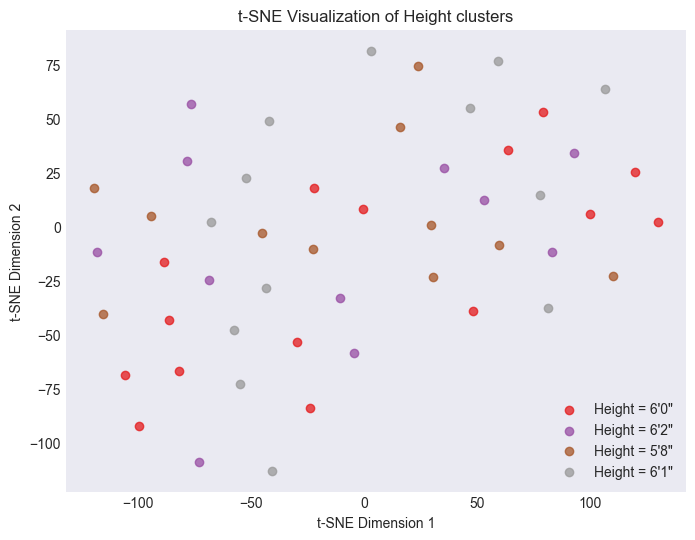

In [10]:
def sampleheights(hembeddings = hembeddings, num_samples=2):
    heights = list(hembeddings.keys())
    all_classes = list(np.arange(0, len(heights)))
    try:
        assert(num_samples<=len(heights))
    except:
        print("number of samples ({num_samples}) > len(heights) = {(len(heights))}!")
    samples = random.sample(all_classes, num_samples)
    print(f"Chosen classes = {samples}")
    for s in samples:
        print(f"Number of each height ({heights[s]}) sample embeddings = {len(hembeddings[heights[s]])}")
    classes = None
    embeddings = None
    for s in samples:
        s_embeddings = hembeddings[heights[s]]
        if(classes is None):
            embeddings = s_embeddings
            classes = np.ones(len(s_embeddings))*s
        else:
            embeddings = np.vstack([embeddings, s_embeddings])
            classes = np.hstack([classes, np.ones(len(s_embeddings))*s])
    return embeddings, classes


def tsnePlot(embeddings, classes, heights=list(hembeddings.keys())):
    tsne = TSNE(n_components=2, random_state=42, init='random', learning_rate=300)
    e = embeddings.reshape(-1, embeddings.shape[2])
    tsne_results = tsne.fit_transform(e)

    # plt.style.use('default')
    plt.style.use('seaborn-dark')  # You can use 'ggplot', 'seaborn-darkgrid', etc.
    plt.figure(figsize=(8, 6))  # Set the figure background to black
    # ax = plt.gca()
    # ax.set_facecolor('black')  # Set the axis background to black
    # ax.tick_params(colors='white')  # Set tick colors to white
    # ax.spines['bottom'].set_color('white')  # Set border color
    # ax.spines['left'].set_color('white')    # Set border color
    # ax.xaxis.label.set_color('white')  # Set x-axis label color
    # ax.yaxis.label.set_color('white')  # Set y-axis label color
    
    unique_classes = np.unique(classes)
    colors = plt.cm.Set1(np.linspace(0, 1, len(unique_classes)))

    for i, uclass in enumerate(unique_classes):
        indices = np.where(classes == uclass)
        plt.scatter(tsne_results[indices, 0], tsne_results[indices, 1], 
                    color=colors[i], label=f'Height = {heights[int(uclass)]}', alpha=0.75)

    plt.title("t-SNE Visualization of Height clusters")
    plt.xlabel("t-SNE Dimension 1")
    plt.ylabel("t-SNE Dimension 2")
    plt.legend()
    plt.show()



embds, classes = sampleheights(num_samples=4)
print(len(embds), len(classes))
tsnePlot(embds, classes)